In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import sys;import os;
module_path = os.path.abspath(os.path.join('..')).split('PythonCode')[0]+'PythonCode'
if module_path not in sys.path: sys.path.append(module_path+"/")
    
import Plib.Options.Models as opt

#### Option on a forward asset

In [2]:
S = 1180
K = 1200
T = 1
Tf = 1
s = 0.18
r = 0.03
t = 0

opt.BS_forward(S,K,T,s,r,t,Tf,side='C')

666.0518407860792

#### Option on a future

In [3]:
fwd_p = 1200
K = fwd_p
T = 1
s = 0.18
r = 0.03
t = 0

opt.BS_future(fwd_p,K,T,s,r,t,side='C')

83.51202248026105

#### Option on a currency

In [4]:
S = 43
K = 45
T = 1
s = 0.25
r = 0.03
t = 0
rfree = 0.02
side = 'C'
opt.BS_curr(S,K,T,s,r,t,rfree,side)


3.5503546041285383

#### BS Option no dividend

In [5]:
S = 43
K = 45
T = 1
s = 0.25
r = 0.03
dv = 0
side = 'C'

opt.BS(S,K,T,s,r,dv,side)


3.9839894153687623

#### Option between time t=0.25 and T=1

In [6]:
S = 43
K = 45
T = 1
s = 0.25
r = 0.03
t = 0.25
dv = 0
side = 'C'
opt.BS_t(S,K,T,s,r,t,dv,side)


3.9839894153687623

#### BS Payoff

In [7]:
narr=opt.BS_payoff(S,K,T,s,r,t,dv,side,LongShort=1)
narr[:10]

[27.1113020220969,
 29.33636757918044,
 31.69704809461258,
 34.1981615776153,
 36.84450140482798,
 39.640826893266535,
 42.591854001771246,
 45.70224619563615,
 48.97660550733029,
 52.419463824320175]

#### Delta Hedging an Option

In [8]:
S = 43
K = 45
T = 1
s = 0.25
r = 0.03
t = 0
dv = 0
side = 'C'
shares,invest,cash=opt.delta_hedge(S,K,T,s,r,t,dv,side)
print('Hedging requires ',np.round(shares,4),'shares and ',np.round(cash,4), 'cash')

Hedging requires  0.5252 shares and  -18.5986 cash


In [9]:
opt.rebalance(46,K,T-0.25,s,r,t,dv,side,shares,cash)


New hedge requires to set 0.593 shares
Buy/Sell  0.0678 shares and repay 3.1199 cash


(0.0678, 3.1199)

In [10]:
opt.makeDHTable(S,K,T,s,r,t,dv,side,prange=8)


Hedging requires  0.5252 shares and  -18.5986 cash
Negative cash implies financing 22.5826 with 18.5986


price   Asset  Liability     HRE
0    35.0 -0.2174     1.0036 -5.6159
1    36.0  0.3078     1.2446  3.0440
2    37.0  0.8329     1.5214  0.8266
3    38.0  1.3581     1.8355  0.3515
4    39.0  1.8833     2.1879  0.1617
5    40.0  2.4085     2.5790  0.0708
6    41.0  2.9336     3.0090  0.0257
7    42.0  3.4588     3.4775  0.0054
8    43.0  3.9840     3.9840  0.0000
9    44.0  4.5092     4.5275  0.0041
10   45.0  5.0343     5.1068  0.0144
11   46.0  5.5595     5.7205  0.0290
12   47.0  6.0847     6.3671  0.0464
13   48.0  6.6099     7.0447  0.0658
14   49.0  7.1350     7.7516  0.0864
15   50.0  7.6602     8.4859  0.1078
16   51.0  8.1854     9.2458  0.1296

#### Delta-Gamma Hedging

In [11]:
p={'S1' : 43,'K1' : 45,'T1' : 1,'s1' : 0.25,'r1' : 0.03,'t1' : 0,'dv1': 0,'side1' : 'C',
  'S2' : 43,'K2' : 45,'T2' : 0.25,'s2' : 0.25,'r2' : 0.03,'t2' : 0,'dv2': 0,'side2' : 'P'}

opt.makeDGHTable(p,prange=8)

Hedging requires  0.7872 units of underlying
Hedging requires  0.4999 units of another derivative and  -31.4213 cash


price   Asset  Liability     HRE
0    38.0  1.9407     1.8355 -0.0542
1    39.0  2.2932     2.1879 -0.0459
2    40.0  2.6699     2.5790 -0.0341
3    41.0  3.0751     3.0090 -0.0215
4    42.0  3.5123     3.4775 -0.0099
5    43.0  3.9840     3.9840  0.0000
6    44.0  4.4916     4.5275  0.0080
7    45.0  5.0354     5.1068  0.0142
8    46.0  5.6143     5.7205  0.0189
9    47.0  6.2262     6.3671  0.0226
10   48.0  6.8686     7.0447  0.0256

#### Whalley Wilmott Hedging Bands

In [12]:
opt.hedgingBands(S,K,T,s,r,t,dv,side,lbd=0.01,g=0.0003)

(-0.8946226238284712, 1.9449759654386254)

#### PnL after N hedges, interval of one std

In [26]:
PnL=150
T=0.25
N=2
opt.hedgingPnL(S,K,T,s,r,t,dv,N,PnL)

(148.65869075820427, 151.34130924179573)

#### BS Implied Volatility

In [14]:
S = 43
K = 45
T = 1
s = 0.25
r = 0.03
t = 0
dv = 0
side = 'C'
opt.BS_iv(3.27, S, K, T, r, dv, type_='C')


0.20833117688382388

#### Plot the greeks

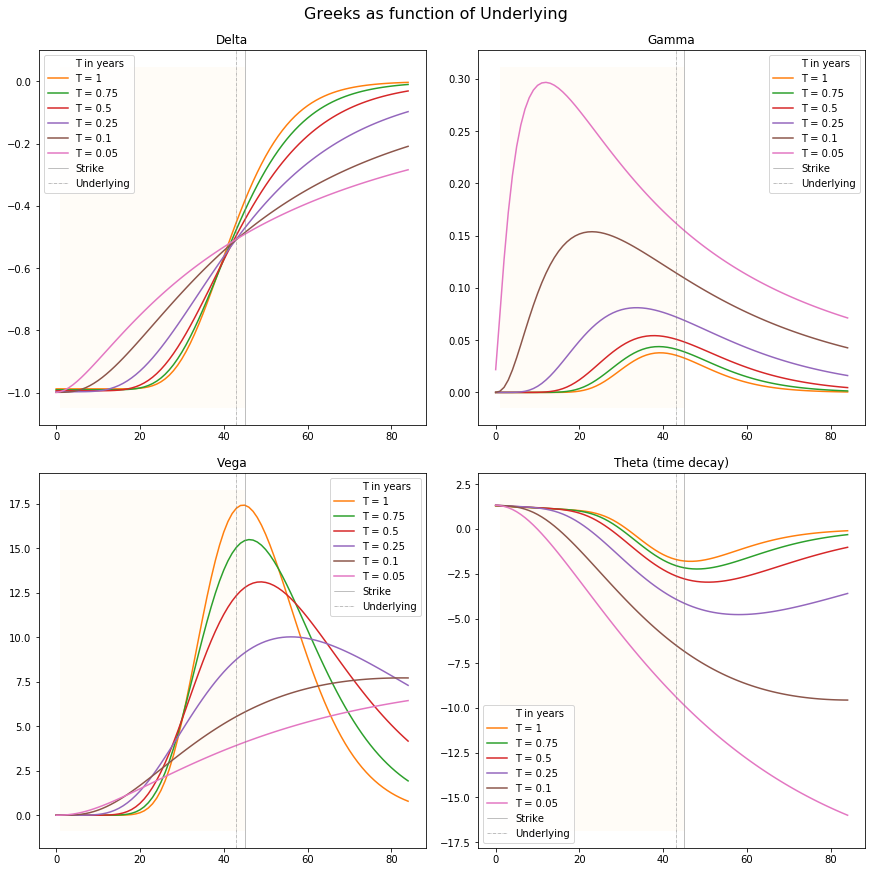

In [20]:
# Numerical approximations
opt.plotGreeks(S=43, K=45, r=0.03, s=0.25, dv=0.0125, side='P',
              title='Greeks as function of Underlying',fs=(12,12))

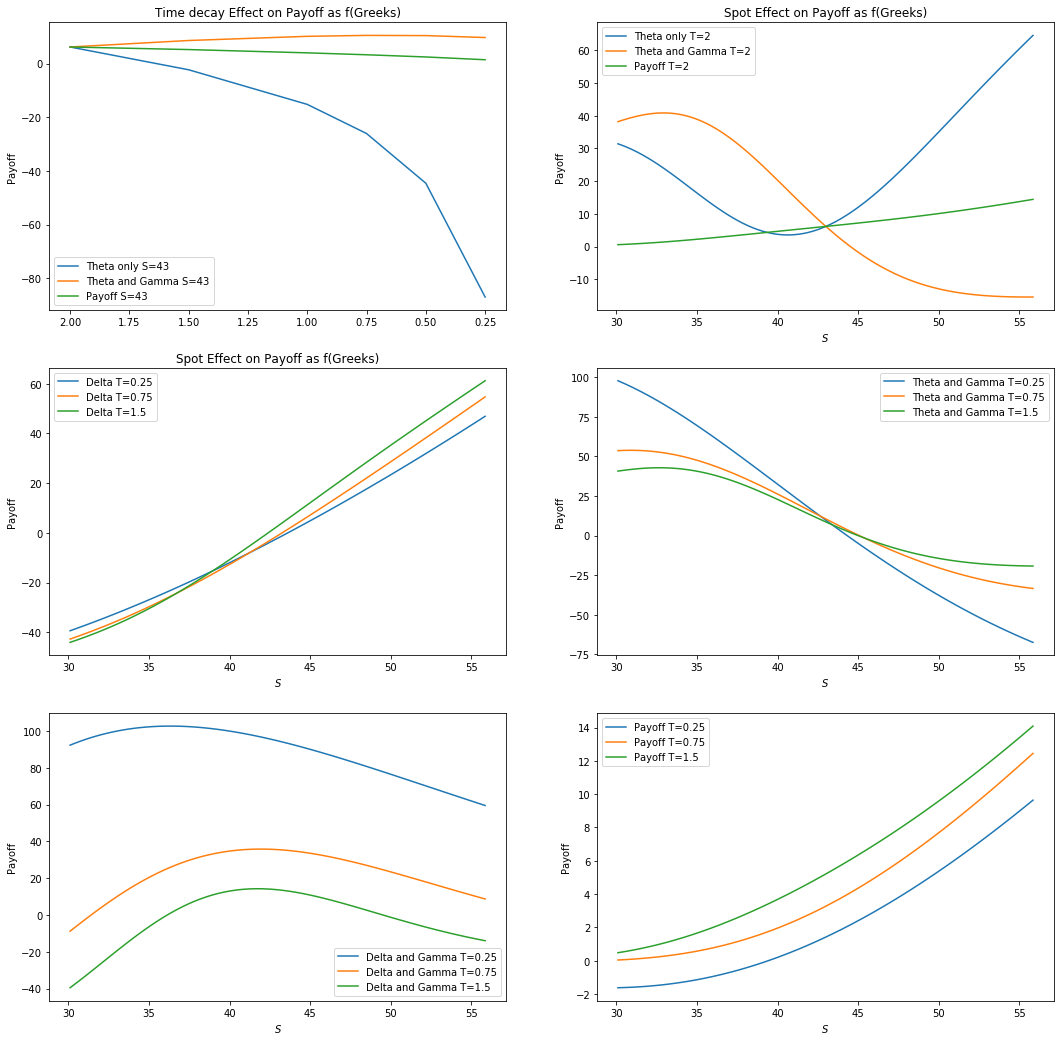

In [21]:
opt.plotGreeksPayoff(S=43, K=45, r=0.03, s=0.25, dv=0, side='C',
                     LongShort=1,prange=[0.30,0.30],step=0.25,fs=(18,18))

#### BS Price from Greeks using BS PDE

In [17]:
S = 43
K = 45
T = 0.5
s = 0.25
r = 0.03
t = 0
dv = 0
side = 'C'

In [18]:
delta = opt.delta(S,K,T,s,r,dv,side)
gamma = opt.gamma(S,K,T,s,r,dv)
theta = opt.theta(S,K,T,s,r,dv,side)
opt.BS_greeks(theta, delta, gamma, S_=S,s_=s,r_=r)

2.4531483192118397

In [19]:
opt.BS(S,K,T,s,r,dv,side)


2.455821026559273

In [22]:
# S,T,s
def dhedge_ZKM(S,K,T,s,r,dv,side,lbd=0.01,g=0.0003):
    gamma=opt.gamma(S,K,T,s,r,dv)
    K_sigma = -4.76 * ((lbd**0.78)/(T**0.02)) * (np.exp(-r*T)/s)**0.25 * (g*abs(gamma)*S**2)**0.15
    H_zero = lbd / (g*S*T*(s)**2)
    H_one = 1.12 * (lbd**0.31) * (T**0.05) * (np.exp(-r*T)/s)**0.25 * (g*abs(gamma)*S**2)**0.15
    vol_m = (1-K_sigma)*s**2
    delta=opt.delta(S,K,T,np.sqrt(vol_m),r,dv,side)
    delta_l,delta_h = delta-(H_zero+H_one),delta+(H_zero+H_one)
    return delta_l,delta_h

dhedge_ZKM(S,K,T,s,r,dv,side,lbd=0.01,g=0.0003)


(-24.535328218377913, 25.507241556350806)